## **Letter and Digit Recognizer**


Everyone of you are using Google Lens for converting image to text. But how does it convert the image to text??. The answer is the Google Vision API which is responsible for recognizing digits. 




The  Deep Learning algorithm below takes the image and identifies the character present in the image and prints it on the screen.

But Firstly, we need to load data to train the model


 1. Downloading Data
 

The cell below is used to mount the drive!!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


We have mounted Drive. Now its time to download the dataset from Kaggle.
This is the link to the [Dataset](https://www.kaggle.com/crawford/emnist).

In [ ]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karthik12s","key":"56a984ed14e695d673666653747fb61e"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Aug 10 04:12 kaggle.json


In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# List available datasets.
!kaggle datasets list 

ref                                                               title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
gpreda/covid19-tweets                                             COVID19 Tweets                                    15MB  2020-08-09 09:39:32            841  
christianlillelund/passenger-list-for-the-estonia-ferry-disaster  MS Estonia Disaster Passenger List                14KB  2020-07-26 15:40:17            209  
Cornell-University/arxiv                                          arXiv Dataset                                      2GB  2020-05-06 23:18:35            976  
jeffreybraun/chipotle-locations                                   Chipotle Locations                               124KB  2020-07-28 20:20:41            297  
jeffreybraun/chopped-10-years-of-episode-data 

In [ ]:
!kaggle datasets download -d crawford/emnist

100% 1.24G/1.24G [00:16<00:00, 83.1MB/s]
100% 1.24G/1.24G [00:16<00:00, 79.5MB/s]


In [ ]:
# Copy the stackoverflow data set locally.
#!kaggle competetions download -c state-farm-distracted-driver-detection

In [ ]:
!unzip \*.zip

Archive:  emnist.zip
  inflating: emnist-balanced-mapping.txt  
  inflating: emnist-balanced-test.csv  
  inflating: emnist-balanced-train.csv  
  inflating: emnist-byclass-mapping.txt  
  inflating: emnist-byclass-test.csv  
  inflating: emnist-byclass-train.csv  
  inflating: emnist-bymerge-mapping.txt  
  inflating: emnist-bymerge-test.csv  
  inflating: emnist-bymerge-train.csv  
  inflating: emnist-digits-mapping.txt  
  inflating: emnist-digits-test.csv  
  inflating: emnist-digits-train.csv  
  inflating: emnist-letters-mapping.txt  
  inflating: emnist-letters-test.csv  
  inflating: emnist-letters-train.csv  
  inflating: emnist-mnist-mapping.txt  
  inflating: emnist-mnist-test.csv   
  inflating: emnist-mnist-train.csv  
  inflating: emnist_source_files/emnist-balanced-test-images-idx3-ubyte  
  inflating: emnist_source_files/emnist-balanced-test-labels-idx1-ubyte  
  inflating: emnist_source_files/emnist-balanced-train-images-idx3-ubyte  
  inflating: emnist_source_files/em

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
from keras.optimizers import Adam

In [ ]:
import pandas as pd

In [ ]:
import time

In [ ]:
import numpy as np

In [ ]:
import glob

In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
trl=pd.read_csv(r'/content/emnist-letters-train.csv')
tel=pd.read_csv(r'/content/emnist-letters-test.csv')

In [ ]:
trn=pd.read_csv(r'/content/emnist-digits-train.csv')
ten=pd.read_csv(r'/content/emnist-digits-test.csv')

In [ ]:
trl.describe()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.376,0.377,0.378,0.379,0.380,0.381,0.382,0.383,0.384,0.385,0.386,0.387,0.388,0.389,0.390,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400,0.401,0.402,0.403,0.404,0.405,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
count,88799.000000,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.0,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,...,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.0,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.0,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.0,88799.0,88799.0,88799.0,88799.0
mean,13.519161,0.0,0.0,0.0,0.000011,0.003987,0.016757,0.024640,0.021487,0.017140,0.010383,0.003198,0.000845,0.000428,0.000417,0.005113,0.009156,0.014392,0.017005,0.008187,0.003063,0.006701,0.005158,0.000315,0.000023,0.000011,0.0,0.0,0.0,0.0,0.000146,0.005394,0.032962,0.083481,0.162367,0.248550,0.310015,0.337864,0.340252,0.280656,...,0.244079,0.241467,0.214777,0.178752,0.159304,0.120384,0.080699,0.066994,0.043120,0.014268,0.000563,0.0,0.0,0.0,0.0,0.002016,0.007737,0.006160,0.000484,0.003435,0.000766,0.002838,0.000113,0.0,0.000034,0.000800,0.000777,0.000417,0.000101,0.000011,0.0,0.0,0.0,0.003041,0.000360,0.0,0.0,0.0,0.0,0.0
std,7.502906,0.0,0.0,0.0,0.003356,0.544042,1.547695,1.915987,1.803280,1.620203,1.134288,0.442168,0.141301,0.073979,0.080469,0.585546,1.075630,1.483225,1.837844,1.017632,0.739508,1.159924,0.890498,0.067617,0.006712,0.003356,0.0,0.0,0.0,0.0,0.019277,0.304741,1.069662,1.844742,3.041025,4.132386,4.624732,4.648264,4.773676,4.239068,...,3.435135,3.322386,2.894163,2.429968,2.483356,2.125638,1.515276,1.490967,1.245944,0.613031,0.049088,0.0,0.0,0.0,0.0,0.516694,1.220705,1.062177,0.091840,0.639703,0.120714,0.738580,0.025557,0.0,0.010067,0.168626,0.164159,0.124165,0.030202,0.003356,0.0,0.0,0.0,0.823450,0.107386,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [ ]:
tel.head()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533,0.534,0.535,0.536,0.537,0.538,0.539,0.540,0.541,0.542,0.543,0.544,0.545,0.546,0.547,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
col=['Digit']
for i in range(784):
    col.append(str(i))
trn.columns=col
ten.columns=col

In [ ]:
col=['Alphabets']
for i in range(784):
    col.append(str(i))
trl.columns=col
tel.columns=col

In [ ]:
digits_column=list(trn['Digit'])
for i in range(len(digits_column)):
    digits_column[i]=int(digits_column[i])+27
trn['Digit']=digits_column

In [ ]:
#digits_column
trn['Digit']

0         36
1         33
2         30
3         33
4         33
          ..
239994    31
239995    29
239996    28
239997    28
239998    27
Name: Digit, Length: 239999, dtype: int64

In [ ]:
x_trn=trn.iloc[:,1:785]
y_trn=trn.iloc[:,0]
x_ten=ten.iloc[:,0:784]

In [ ]:
x_trl=trl.iloc[:,1:785]
y_trl=trl.iloc[:,0]
x_tel=tel.iloc[:,0:784]

In [ ]:
x_trl1=x_trl
x_trl1=np.array(x_trl1)
print(np.shape(x_trl1))
x_trl1=list(x_trl1)
print(len(x_trl1))
y_trl1=y_trl
y_trl1=np.array(y_trl1)
print(np.shape(y_trl1))
y_trl1=list(y_trl1)
len(y_trl1)

(88799, 784)
88799
(88799,)


88799

In [ ]:
x_tel1=x_tel
x_tel1=np.array(x_tel1)
print(np.shape(x_tel1))
x_tel1=list(x_tel1)
print(len(x_tel1))

(14799, 784)
14799


In [ ]:
x_trn1=x_trn
x_trn1=np.array(x_trn1)
print(np.shape(x_trn1))
x_trn1=list(x_trn1)
print(len(x_trn1))
y_trn1=y_trn
y_trn1=np.array(y_trn1)
print(np.shape(y_trn1))
y_trn1=list(y_trn1)
len(y_trn1)

(239999, 784)
239999
(239999,)


239999

In [ ]:
x_ten1=x_ten
x_ten1=np.array(x_ten1)
print(np.shape(x_ten1))
x_ten1=list(x_ten1)
print(len(x_ten1))


(39999, 784)
39999


In [ ]:
for i in range(len(y_trl1)):
    x_trn1.append(x_trl1[i])
    y_trn1.append(y_trl1[i])

In [ ]:
for i in range(len(x_tel1)):
    x_ten1.append(x_tel1[i])

In [ ]:
x_trn1=np.array(x_trn1)
y_trn1=np.array(y_trn1)

In [ ]:
x_ten1=np.array(x_ten1)

In [ ]:
x_tr=x_trn1
y_tr=y_trn1

In [ ]:
x_te=x_ten1

In [ ]:
del x_tel1,x_trl1,x_trn,x_trn1,x_trl,x_tel,x_ten,x_ten1

tr=trl
for i in range(len(trn['Digit'])):
    tr.append(trn[i:i+1])

te=tel
for i in range(len(ten['1'])):
    te.append(ten[i:i+1])

tr.describe()

x_tr=tr.iloc[:,1:785]
y_tr=tr.iloc[:,0]
x_te=te.iloc[:,0:784]

x_tr=np.array(x_tr)
y_tr=np.array(y_tr)
x_te=np.array(x_te)

np.shape(x_te)

np.shape(x_te[0])

In [ ]:
np.shape(x_tr)

(328798, 784)

In [ ]:
np.shape(x_tr[0])

(784,)

In [ ]:
a=x_tr[0].reshape(28,28)

In [ ]:
a=[]
for i in range(len(x_tr)):
  a.append(x_tr[i].reshape(28,28))

In [ ]:
x_tr=np.array(a)

In [ ]:
x_tr=x_tr.reshape(328798,28,28,1)

In [ ]:
a=[]
for i in range(len(x_te)):
  a.append(x_te[i].reshape(28,28))

In [ ]:
x_te=np.array(a)
x_te=x_te.reshape(x_te.shape[0],28,28,1)

In [ ]:
np.shape(a)

(54798, 28, 28)

In [ ]:
np.shape(x_tr[0])

(28, 28, 1)

In [ ]:
del a

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_valid,y_train,y_valid=train_test_split(x_tr,y_tr,test_size=0.2,random_state=0)

In [ ]:
np.shape(x_valid)

(65760, 28, 28, 1)

In [ ]:
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten,Dense

In [ ]:
model=keras.models.Sequential()
model.add(Conv2D(32,kernel_size=3,strides=1,padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=3,strides=1,padding='same',input_shape=(28,28)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(128,kernel_size=3,strides=1,padding='same',input_shape=(28,28)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(37,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)          2

In [ ]:
checkpoint=keras.callbacks.ModelCheckpoint('Letter&Digit_recognizer1.h5',save_best_only=True)

In [ ]:
from tensorflow.keras.optimizers import Adam
opt=Adam(lr=0.0003)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_hist=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=10,callbacks=[checkpoint])

Epoch 1/10
1010/8220 [==>...........................] - ETA: 27s - loss: 0.7516 - accuracy: 0.7929

KeyboardInterrupt: ignored

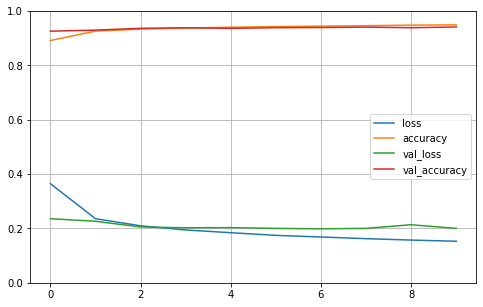

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(model_hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model = keras.models.load_model("Letter&Digit_recognizer.h5")

In [ ]:
#del a

In [ ]:
np.shape(x_te)

(54798, 28, 28, 1)

In [ ]:
pred=model.predict(x_te)

In [ ]:
lis=[0,'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',0,1,2,3,4,5,6,7,8,9]

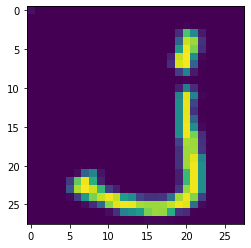

The chracter is: j


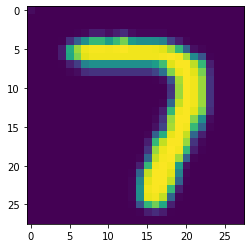

The chracter is: 7


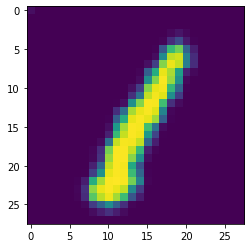

The chracter is: 1


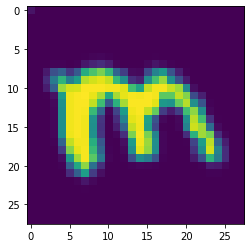

The chracter is: m


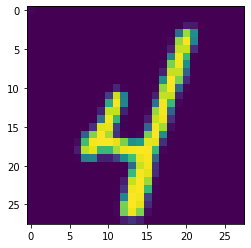

The chracter is: 4


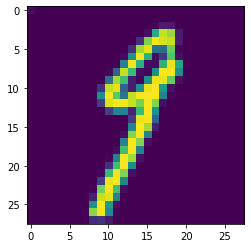

The chracter is: 9


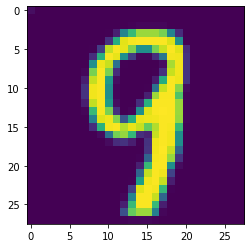

The chracter is: 9


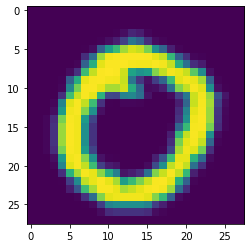

The chracter is: 0


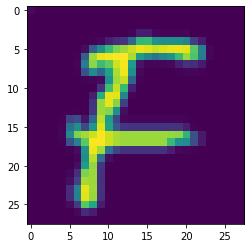

The chracter is: f


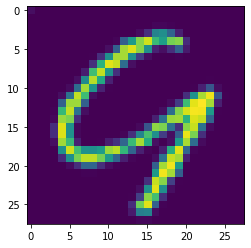

The chracter is: 9


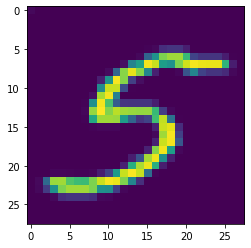

The chracter is: 5


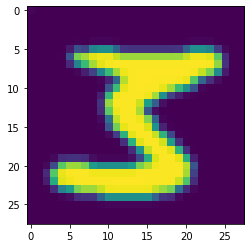

The chracter is: 3


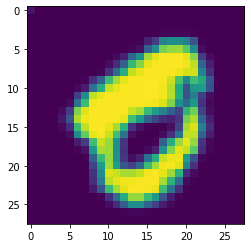

The chracter is: 0


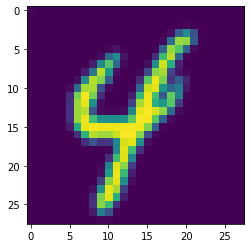

The chracter is: 4


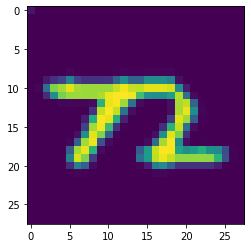

The chracter is: n


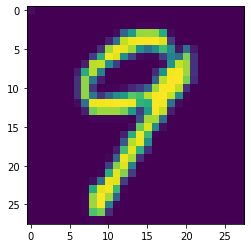

The chracter is: 9


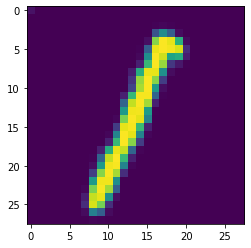

The chracter is: 1


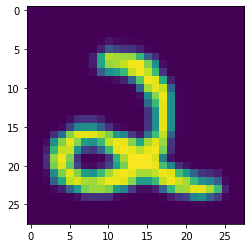

The chracter is: 2


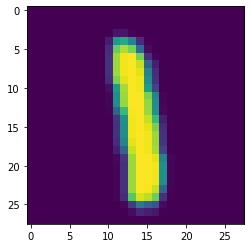

The chracter is: 1


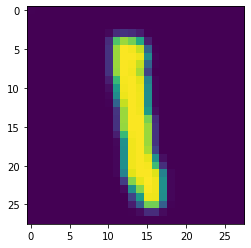

The chracter is: 1


In [ ]:
for i in range(20):
    t=int((1-np.random.rand())*54727)
    fir=x_te[t]
    fir=fir.reshape(28,28)
    fir=fir.T
    plt.imshow(fir)
    plt.show()
    p=list(pred[t].round(2))
    print('The chracter is:',lis[p.index(max(p))])
    time.sleep(1)
    plt.close()
#plt.imshow()

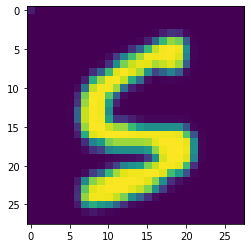

In [ ]:
plt.imshow(x_te[54727].reshape(28,28).T)

In [ ]:
len(x_te)

14799

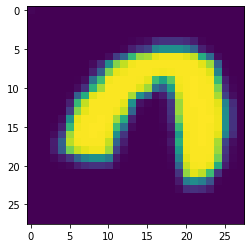

In [ ]:
plt.imshow(fir.T)

In [ ]:
p=list(pred[t].round(2))
print(lis[p.index(max(p))])

b


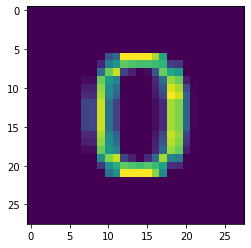

In [ ]:
le=cv2.imread('C:/Users/KARTHIK SURINENI/OneDrive/Pictures/numbers/00.png',0)
le=~le
le=cv2.resize(le,(28,28))
le=np.array(le)
#le=le.reshape(28,28)
plt.imshow(le)
le1=le.T
le=le1.reshape(784,)

In [ ]:
#plt.imshow(le1)

In [ ]:
les=np.array([le,le])
p=model.predict(les)
p[0].round(2)

array([0.  , 0.01, 0.  , 0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.04, 0.22, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.64, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  ], dtype=float32)

In [ ]:
p=list(p[0])
print(lis[p.index(max(p))])

0


In [ ]:
/content/drive/My Drive/numbers

In [ ]:
path=glob.glob('/content/drive/My Drive/numbers/*.PNG')

In [ ]:
path

[]

In [ ]:
images=[]
for i in path:
    image=cv2.imread(i,0)
    image=~image
    image=cv2.resize(image,(28,28))
    image=np.array(image)
    image=image.T
    image=image.reshape(28,28,1)
    images.append(image)

In [ ]:
images=np.array(images)

In [ ]:
images

array([], dtype=float64)

In [ ]:
predicted_letters=model.predict(images)
predicted_letters=predicted_letters.round(2)

In [ ]:
letter_names=[]
predicted_letters=list(predicted_letters)
for i in range(len(predicted_letters)):
    predicted_letters[i]=list(predicted_letters[i])
    letter_names.append(lis[predicted_letters[i].index(max(predicted_letters[i]))])

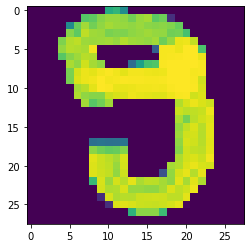

In [ ]:
plt.imshow(images[11].reshape(28,28).T)

In [ ]:
letter_names

[7, 8, 5, 4, 'i', 6, 0, 9, 3, 2, 2, 'g', 5, 2, 6, 0]

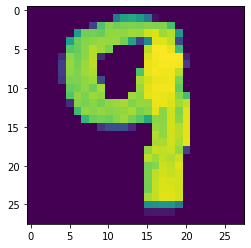

In [ ]:
im=images[14].reshape(28,28)
plt.imshow(im.T)